# Moving average
lev_l values have large measurement errors. To avoid predicting errors, we should replace measured raw values by moving average.
#### To fix
- size of window to calculate average
- Null management

[See ISSUE](https://github.com/hiroshi-kuriyama/rail_level_gap/issues/4)

In [1]:
import os
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
input_dir = '../input/'
working_dir = '../working/'
output_dir = '../output/'

## Read data

In [3]:
def read_track(line_name='a'):
    track_df = pd.read_csv(os.path.join(input_dir, 'track_{}.csv'.format(line_name.upper())))
    col_names_track = ['date', 'kilo', 'lev_l', 'lev_r', 'cur_l', 'cur_r', 'cant', 'width', 'speed']
    track_df.columns = col_names_track
    track_df['date'] = pd.to_datetime(track_df['date'])
    print('track_{line_name} shape: {shape}'.format(line_name=line_name.upper(), shape=track_df.shape))
    return track_df

In [4]:
def read_equ(line_name='a'):
    equ_df = pd.read_csv(os.path.join(input_dir, 'equipment_{}.csv'.format(line_name.upper())))
    col_names_equ = ['kilo', 'is_ballast', 'is_long', 'sleeper_type', 'is_bridge', 'is_crossing', 'gross_ton', 'radius', 'is_unreliable']
    equ_df.columns = col_names_equ
    print('equ_{line_name} shape: {shape}'.format(line_name=line_name.upper(), shape=equ_df.shape))
    return equ_df

In [5]:
abcd_list = ['a', 'b', 'c', 'd']
track = {}
equ = {}
for abcd in abcd_list:
    track[abcd] = read_track(abcd)
    equ[abcd] = read_equ(abcd)

track_A shape: (10185690, 9)
equ_A shape: (27906, 9)
track_B shape: (7815753, 9)
equ_B shape: (21531, 9)
track_C shape: (20324660, 9)
equ_C shape: (55684, 9)
track_D shape: (5601687, 9)
equ_D shape: (15691, 9)


In [12]:
lev_df = {}
lev_diff = {}
for abcd in abcd_list:
    # pivot
    lev_df[abcd] = track[abcd].pivot(index='date', columns='kilo', values='lev_l')
    lev_df[abcd].columns = lev_df[abcd].columns.astype('str')

In [ ]:
abcd = 'a'
lev_df = lev_df[abcd]
# lev_diff = lev_diff[abcd]

In [56]:
window_r = 20
min_periods_r = 14

In [57]:
lev_df_ma = lev_df.rolling(window=window_r, min_periods=min_periods_r, center=True, axis=0).mean()
lev_df_ma.head(10)

kilo,10000,10001,10002,10003,10004,10005,10006,10007,10008,10009,...,37896,37897,37898,37899,37900,37901,37902,37903,37904,37905
date,,,,,,,,,,,,,,,,,,,,,
2017-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-07,-1.118571,-0.987143,-0.739286,-0.131429,1.042857,2.646429,4.051429,4.360714,2.937857,-0.096429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-08,-1.106667,-0.988667,-0.761333,-0.176667,0.980667,2.576667,3.983333,4.299333,2.885333,-0.134000,...,NaN,NaN,0.51000,NaN,2.307143,NaN,NaN,NaN,NaN,NaN
2017-04-09,-1.111250,-0.997500,-0.776250,-0.199375,0.951875,2.546875,3.958750,4.283750,2.878750,-0.135000,...,-0.085000,0.091429,0.50400,1.274286,2.302000,3.172143,3.362857,2.639286,1.257857,-0.142857


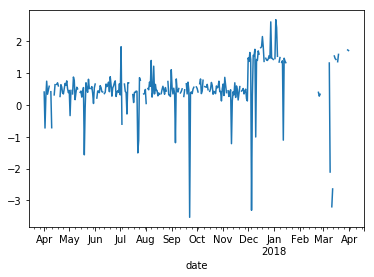

In [58]:
lev_df['25000'].plot()

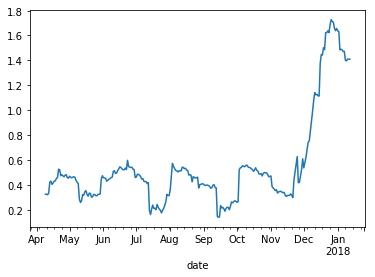

In [59]:
lev_df_ma['25000'].plot()